# Qutip project 4

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

## Introduction

In this notebook we're going to look for sub-harmonic resonances of a single spin. The sub-harmonic resonances are more pronounce when the driving field is strong enough. A spin is driven by a field that has both transversal and longitudinal components, $B(t)=(0, B \sin\theta, B \cos\theta)\cos\left( \omega_d t \right)$. The Hamiltonian of the system is 

$$ H = \left(\frac{\hbar}{2}\omega_0 + 2\hbar\Omega \cos\theta  \cos\left( \omega_d t \right) \right) \sigma_z + 2\hbar\Omega \sin\theta  \cos\left( \omega_d t \right) \sigma_x,$$

where $\omega_0$ is the systems transition frequency, $\sigma_i$ with $i=x,y,z$ is Pauli-matrix acting on the TLS system, $\omega_d$ is the driving frequency, and $\Omega(t)$ is half of the coherent driving strength. 



First we will study resonant frequencies in the situation that the driving field is purely transversal ($\theta=\pi/2$). Then we will find resonant frequencies for fields with equal transversal and longitudinal strength ($\theta=\pi/4$).


# Definition of the system

In [5]:
def qubit_integrate_labframe(omega_0, omega_d, rabi, theta,psi0, solver, phi = 0, g1 = 0, g2 = 0):

    H0 = (omega_0/2) * sigmaz()
    H1 = 2 * rabi * np.sin(theta) * sigmax()
    H2 = 2 * rabi * np.cos(theta) * sigmaz()
    
    def H1_coeff(t, args):
        return np.cos(omega_d*t+phi)
        
    def H2_coeff(t, args):
        return np.cos(omega_d*t+phi)
    
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
    
    H = [H0, [H1,H1_coeff],  [H2,H2_coeff]]
    
    if solver == "me": # master equation
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es": # exact schrodinger
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc": # monte carlo
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, e_ops)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2] # Time-dependent expectation values of the qubit’s Pauli operators

# Transversal Field

Here we will find the resonant frequencies in the situation that the driving field is purely transversal ($\theta=\pi/2$). 

An example of the third harmonic with the driving strength rabi=$0.05\pi$ is shown in the next cell. The green curve is at the resonance which has the oscillation amplitude roughly equal to 1. The resonance frequency is roughly  $\omega_d=0.3371\pi$.

The resonant frequency depends on driving strength. Demonstrate this with the following steps:
* Change the driving strength to rabi=$0.10\pi$. 
* Try to find the resonance frequecy $\omega_d$ such that the oscillation has minimal value smaller than -0.95. 
* Plot the curves.


c:\Users\myria\AppData\Local\Programs\Python\Python314\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


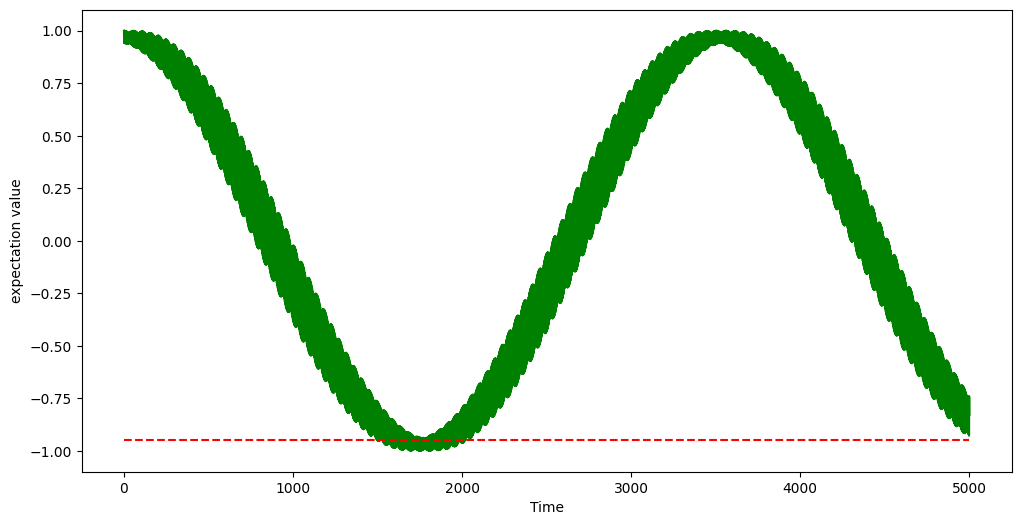

In [6]:
# in this case, the minimal value is already smaller than -0.95
rabi = 0.05 * np.pi   # drive amplitude, how strongly the spin is driven
omega_d = 1.0 * np.pi * 0.3371   # drive frequency
## only change the code above this line

omega_0 = 1.0 * np.pi   # resonance frequency
theta = 0.5 * np.pi
g2 = 0.0 # noise
g1 = 0.0

# initial state
psi0 = basis(2,0)

tlist = np.linspace(0,5000,10000)

_, _, sz_brwa_d = qubit_integrate_labframe(omega_0, omega_d, rabi, theta, psi0,"me", g1, g2)


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sz_brwa_d), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');




-0.9583878390924675
0.96


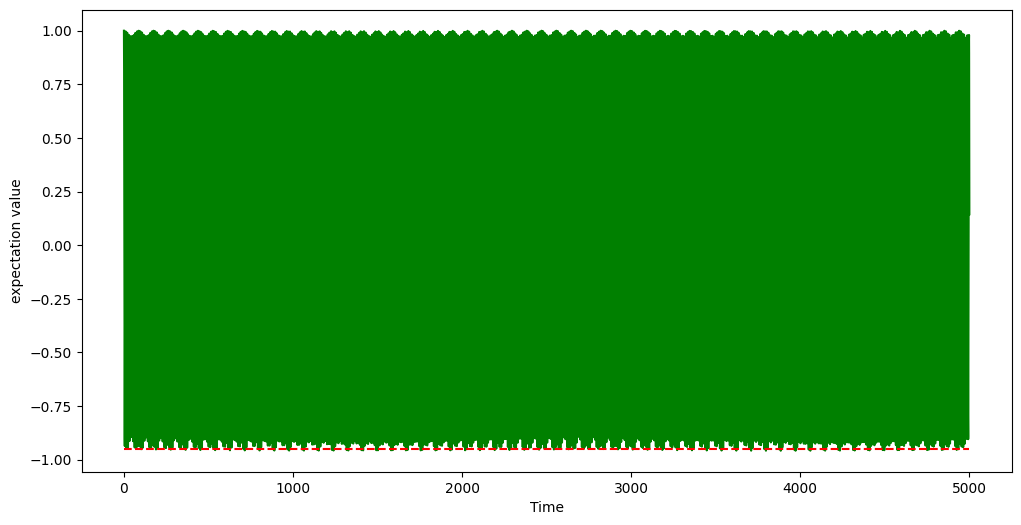

In [ ]:
rabi   = 0.1 * np.pi   # drive amplitude, how strongly the spin is driven
omega_d_for_min = 1.0* np.pi
for i in np.arange(0.0, 1.0, 0.01): 

    omega_d = i * np.pi    # drive frequency
    min_sz = 1.0
    min_sz_array = None

    omega_0 = 1.0 * np.pi   # resonance frequency
    theta = 0.5 * np.pi
    g2 = 0.0 # noise
    g1 = 0.0

    # initial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,5000,10000)

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, omega_d, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz:
        min_sz = np.min(np.real(sz_brwa_d))
        min_sz_array = sz_brwa_d
        omega_d_for_min = omega_d
        if min_sz < -0.95:
            break
    
print(min_sz)
print(omega_d_for_min/np.pi)




fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');




In [8]:
# N=1
# theta = 0.5 * np.pi # Driving angle, 
# rabi = 0.1 *np.pi# Drive amplitude

# omega_0 = 1.0 * np.pi
# psi0 = basis(2,0)
# t_max = 150000 
# tlist = np.linspace(0, t_max, 5000)

# # Two steps to find the subharmonic frequency estimation: 1. "coarse" scanning, 2. finer scanning around the lower estimate.
# omega_est = 0. * np.pi  # Initial estimate for N
# coarse_range = np.linspace(omega_est - 0.002, omega_est + 0.002 * np.pi, 20)

# print(f"Coarse scanning for N={N}")
# depths = []
# for od in coarse_range:
#     _, _, sz = qubit_integrate_labframe(omega_0, od, rabi, theta, psi0, "me", 0, 0, 0, tlist)
#     depths.append(np.min(np.real(sz)))

# # Second step
# coarse_estimate = coarse_range[np.argmin(depths)]
# fine_range = np.linspace(coarse_estimate - 0.0001*np.pi, coarse_estimate + 0.0001*np.pi, 30)

# print(f"Fine scanning around {coarse_estimate/np.pi:.32f}π")
# fine_depths = []
# for od in fine_range:
#     _, _, sz = qubit_integrate_labframe(omega_0, od, rabi, theta, psi0, "me", 0, 0, 0, tlist)
#     fine_depths.append(np.min(np.real(sz)))

# min_omega_d = fine_range[np.argmin(fine_depths)]
# print(f"Optimal omega_d: {min_omega_d/np.pi:.64f}π")

# tlist_final = np.linspace(0, t_max, 10000)
# _, _, sz_final = qubit_integrate_labframe(omega_0, min_omega_d, rabi, theta, psi0, "me", 0, 0, 0, tlist_final)

# fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(tlist_final, np.real(sz_final), 'g', label="sz")
# ax.plot((0, t_max), (-0.95, -0.95), 'r--', label="target")
# ax.set_ylim(-1.1, 1.1)
# ax.set_title(f"N={N} Resonance at w_d = {min_omega_d/np.pi:.10f}π")
# plt.legend()
# plt.show()

# Non-transversal field

Find the second harmonic as well as the third harmonic resonance in the following cases where longitudinal driving field is non-zero.
Show that these depend on the inclination of the driving field by trying the following configurations:
* set theta=0.45$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.45\pi)}$.
* set theta=0.40$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.40\pi)}$.
* set theta=0.49$\pi$ and the driving strength rabi = $\frac{0.05 \pi}{sin(0.49\pi)}$.

c:\Users\myria\AppData\Local\Programs\Python\Python314\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


for theta  1.413716694115407
omega_d_2 is  0.5068309886183756
min for omega_d_2  -0.9999878611168672
omega_d_3 is  0.33703849938242925
omega for d_3 is  0.04344166522091447


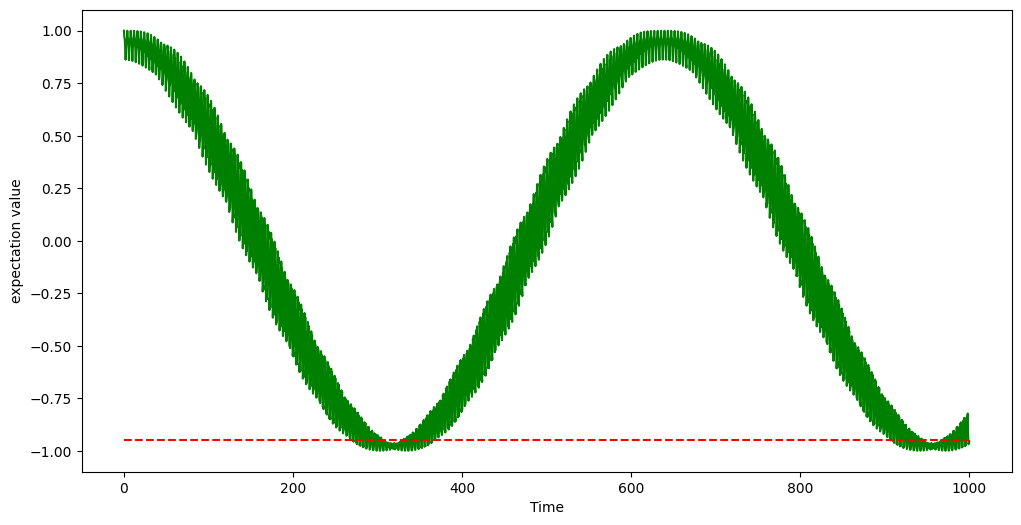

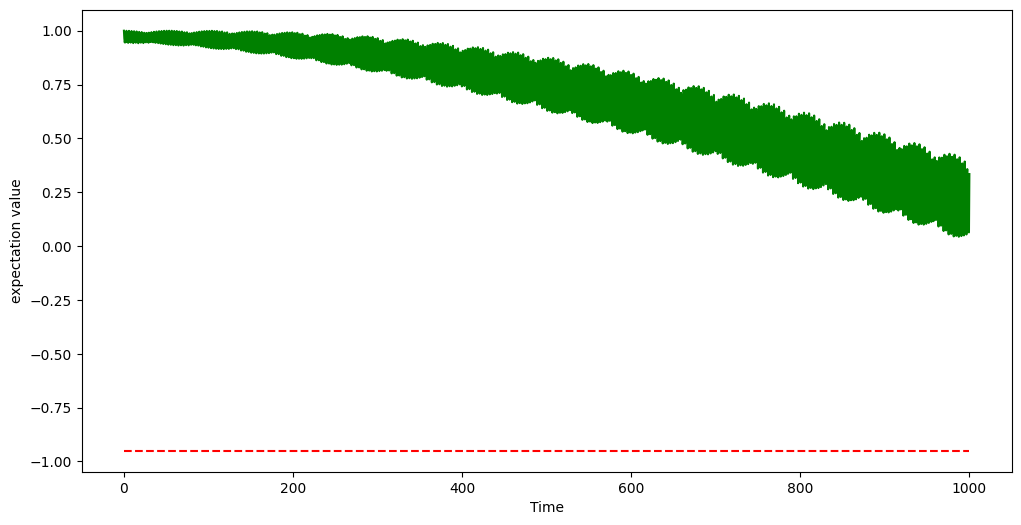

In [ ]:
theta = 0.45*np.pi  
rabi = 0.05 * np.pi/np.sin(theta)   # drive amplitude
omega_d = 1.0 * np.pi * 0.5   # drive frequency
omega_0 = 1.0 * np.pi   # resonance frequency
g2 = 0.0
g1 = 0.0
min_sz_2 = 1.0
min_sz_array_2 = []

omega_d_2 = 1.0 * np.pi* 0.5
delta_2 = 0.05 * omega_d_2# should i divide by pi?
for om in np.arange(omega_d_2 - delta_2, omega_d_2 + delta_2, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_2:
        min_sz_2 = np.min(np.real(sz_brwa_d))
        min_sz_array_2 = sz_brwa_d
        omega_d = om

omega_d_2 = omega_d
print("for theta ", theta)
print("omega_d_2 is ", omega_d_2/np.pi)
print("min for omega_d_2 ", np.min(min_sz_array_2))



omega_d = 1.0 * np.pi
omega_d_3 = 1.0 * np.pi/3
delta_3 = 0.05 * omega_d_3# should i divide by pi?
min_sz_3 = 1.0
min_sz_array_3 = []
for om in np.arange(omega_d_3 - delta_3, omega_d_3 + delta_3, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_3:
        min_sz_3 = np.min(np.real(sz_brwa_d))
        min_sz_array_3 = sz_brwa_d
        omega_d = om

omega_d_3 = omega_d
print("omega_d_3 is ", omega_d_3/np.pi)
print("min for omega_d_3 is ", np.min(min_sz_array_3))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_2), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_3), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');








for theta  1.2566370614359172
omega_d_2 is  0.5074676083907431
min for omega_d_2  -0.9999429599544065
omega_d_3 is  0.33735680926861306
omega for d_3 is  0.7882391161541317


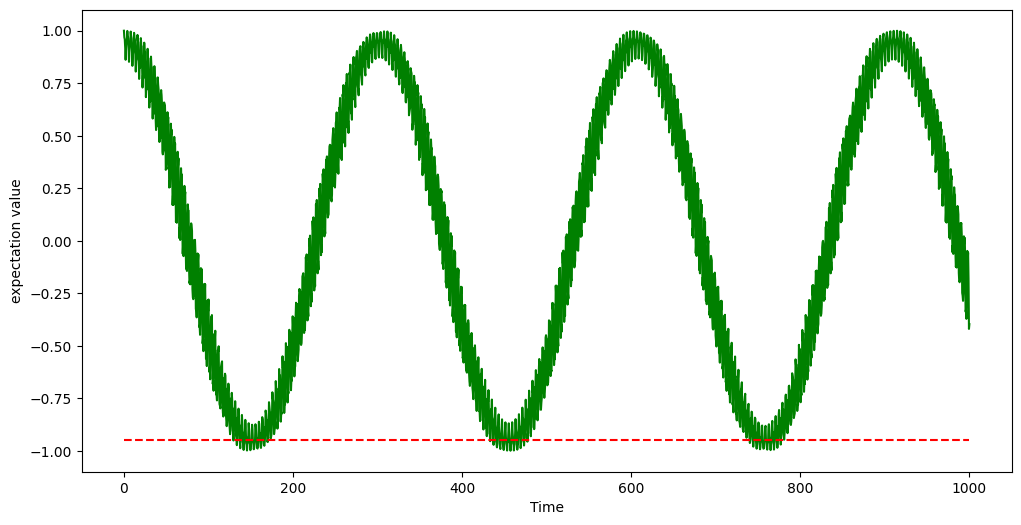

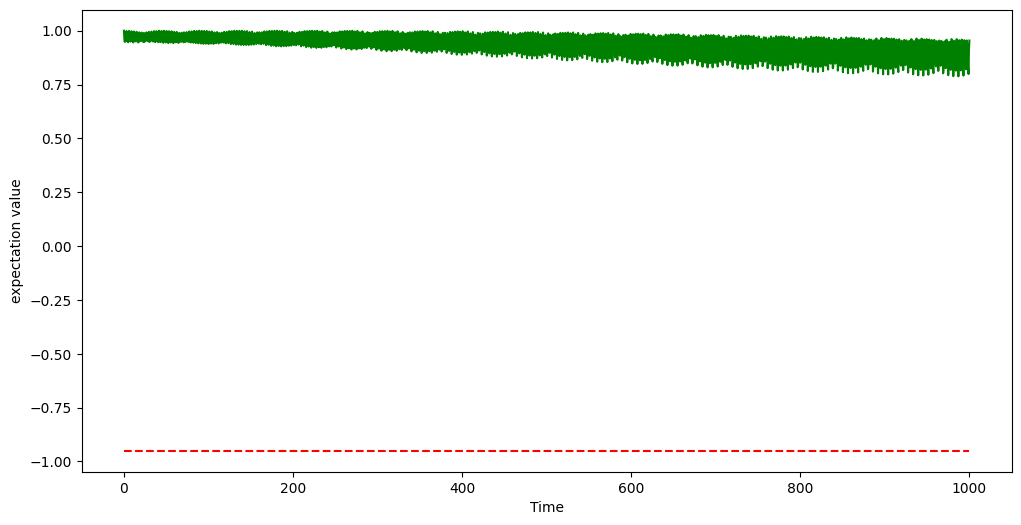

In [ ]:
theta = 0.4*np.pi  
rabi = 0.05 * np.pi/np.sin(theta)   # drive amplitude
omega_d = 1.0 * np.pi * 0.5   # drive frequency
omega_0 = 1.0 * np.pi   # resonance frequency
g2 = 0.0
g1 = 0.0
min_sz_2 = 1.0
min_sz_array_2 = []

omega_d_2 = 1.0 * np.pi* 0.5
delta_2 = 0.05 * omega_d_2# should i divide by pi?
for om in np.arange(omega_d_2 - delta_2, omega_d_2 + delta_2, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_2:
        min_sz_2 = np.min(np.real(sz_brwa_d))
        min_sz_array_2 = sz_brwa_d
        omega_d = om

omega_d_2 = omega_d
print("for theta ", theta)
print("omega_d_2 is ", omega_d_2/np.pi)
print("min for omega_d_2 ", np.min(min_sz_array_2))



omega_d = 1.0 * np.pi
omega_d_3 = 1.0 * np.pi/3
delta_3 = 0.05 * omega_d_3# should i divide by pi?
min_sz_3 = 1.0
min_sz_array_3 = []
for om in np.arange(omega_d_3 - delta_3, omega_d_3 + delta_3, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_3:
        min_sz_3 = np.min(np.real(sz_brwa_d))
        min_sz_array_3 = sz_brwa_d
        omega_d = om

omega_d_3 = omega_d
print("omega_d_3 is ", omega_d_3/np.pi)
print("min for omega_d_3 is ", np.min(min_sz_array_3))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_2), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_3), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');








for theta  1.5393804002589986
omega_d_2 is  0.5068309886183756
min for omega_d_2  -0.5758736821512347
omega_d_3 is  0.33703849938242925
omega for d_3 is  -0.2693756312130406


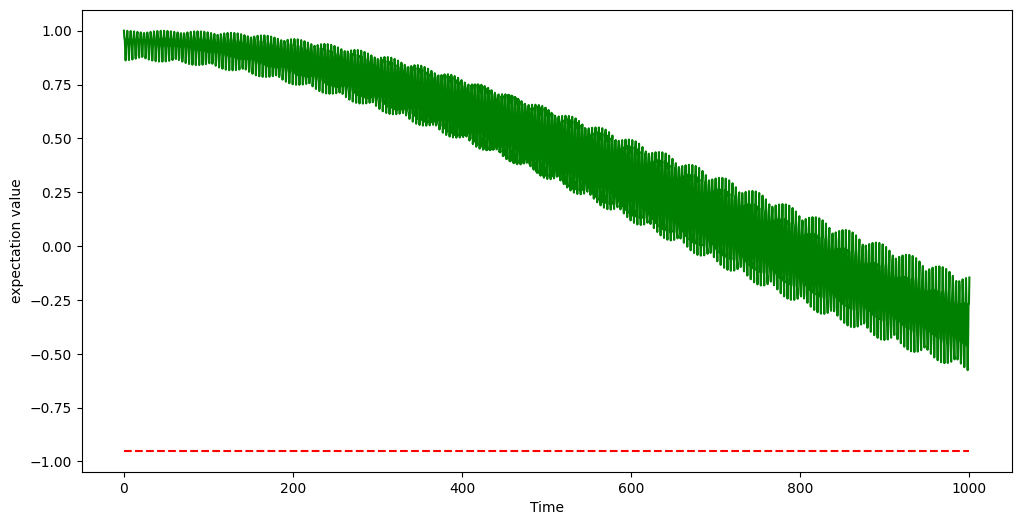

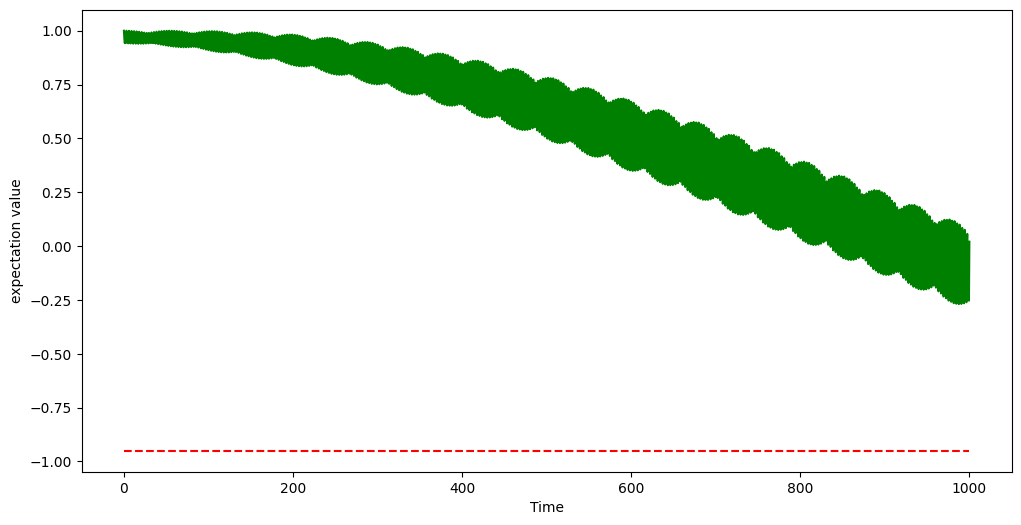

In [ ]:
theta = 0.49*np.pi  
rabi = 0.05 * np.pi/np.sin(theta)   # drive amplitude
omega_d = 1.0 * np.pi * 0.5   # drive frequency
omega_0 = 1.0 * np.pi   # resonance frequency
g2 = 0.0
g1 = 0.0
min_sz_2 = 1.0
min_sz_array_2 = []

omega_d_2 = 1.0 * np.pi* 0.5
delta_2 = 0.05 * omega_d_2# should i divide by pi?
for om in np.arange(omega_d_2 - delta_2, omega_d_2 + delta_2, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_2:
        min_sz_2 = np.min(np.real(sz_brwa_d))
        min_sz_array_2 = sz_brwa_d
        omega_d = om

omega_d_2 = omega_d
print("for theta ", theta)
print("omega_d_2 is ", omega_d_2/np.pi)
print("min for omega_d_2 ", np.min(min_sz_array_2))



omega_d = 1.0 * np.pi
omega_d_3 = 1.0 * np.pi/3
delta_3 = 0.05 * omega_d_3# should i divide by pi?
min_sz_3 = 1.0
min_sz_array_3 = []
for om in np.arange(omega_d_3 - delta_3, omega_d_3 + delta_3, 0.001):
    # intial state
    psi0 = basis(2,0)

    tlist = np.linspace(0,1000,2000) # time list

    _, _, sz_brwa_d = qubit_integrate_labframe(omega_0, om, rabi, theta, psi0,"me", g1, g2)
    if np.min(np.real(sz_brwa_d)) <min_sz_3:
        min_sz_3 = np.min(np.real(sz_brwa_d))
        min_sz_array_3 = sz_brwa_d
        omega_d = om

omega_d_3 = omega_d
print("omega_d_3 is ", omega_d_3/np.pi)
print("min for omega_d_3 is ", np.min(min_sz_array_3))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_2), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(min_sz_array_3), 'g')
ax.plot((np.min(tlist),np.max(tlist)),(-0.95, -0.95), 'r--' )
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');








In [26]:
print(sz_brwa_d)

[1.         0.96411721 0.94452434 ... 0.95053429 0.94850205 0.94378322]
